In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import Imputer 

In [2]:
xtest = pd.read_csv("test.csv")
xtrain = pd.read_csv("train.csv")



In [3]:
#Here we appropriately separate our features from our output column.
X = xtrain.drop(['SalePrice'], axis=1)
y = xtrain['SalePrice']
listedX = xtest[list(xtest)]

In [4]:
#Convert categorical data to numeric
changeMetric = pd.get_dummies(X)
changedMetric = pd.get_dummies(listedX)
xtrain, xtest = changeMetric.align(changedMetric, join='left', axis=1)

In [5]:
#Imputer is used to fill in missing data with appropriate values. ex:) data = [1,2,3,NA]
filler = Imputer()
filledTrain = filler.fit_transform(xtrain)
filledTest = filler.transform(xtest)

C:\Users\joebu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [6]:
#Here we create our DecisionTree model and fit it to our filled Data, we also create our prediction variable
dTree=DecisionTreeRegressor()
clf = dTree.fit(filledTrain,y)
prediction = dTree.predict(filledTest)


In [7]:
#For submission purposes we create our output dataframe and then write it to a csv file
output = pd.DataFrame({'ID': xtest.Id, 'SalePrice': prediction})

output.to_csv('output.csv',index=False)

In [1]:
#Visualize decision tree

In [9]:
from sklearn import tree
import graphviz
from IPython.display import Image
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

labels = list(xtest.columns.values)
#Here we visualize our decision tree
dot_data = tree.export_graphviz(clf, out_file = None, filled = True, feature_names = labels)
graph = pydotplus.graph_from_dot_data(dot_data)  
image = Image(graph.create_png())
image


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.392255 to fit



In [96]:
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import train_test_split

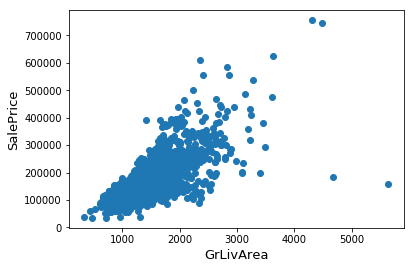

In [97]:


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()   #looking at outliers that should not be in the data because it will mess up the modelling



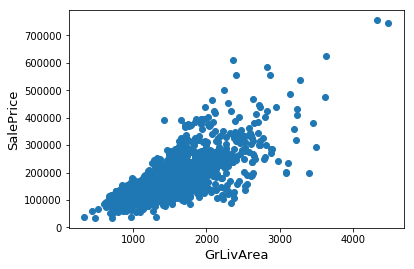

In [98]:
showScatter = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index) #removing the 2 outliers on the right

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
fig, ax = plt.subplots()
ax.scatter(x = showScatter['GrLivArea'], y = showScatter['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show() 

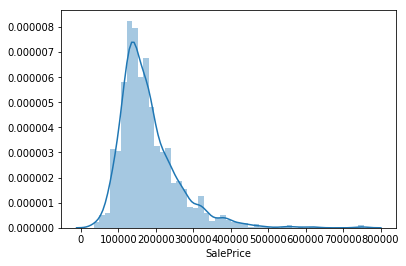

In [99]:
#removing outliers
train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
#checking skewness/shows right skew
sns.distplot(train['SalePrice'])

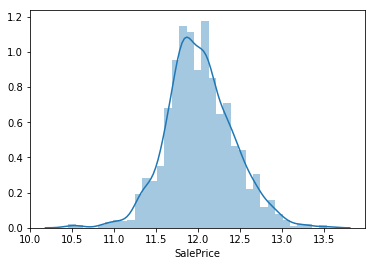

In [100]:
train["SalePrice"] = np.log1p(train["SalePrice"])
y = train['SalePrice'].reset_index(drop=True)
#fixing saleprice skewness
sns.distplot(y)

In [101]:
trainFeat = train.drop(['SalePrice'], axis=1)
testFeat = test
features = pd.concat([trainfeat, testFeat]).reset_index(drop=True)

In [102]:
features.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL       65.000     8450   Pave   NaN      Reg   
1          20       RL       80.000     9600   Pave   NaN      Reg   
2          60       RL       68.000    11250   Pave   NaN      IR1   
3          70       RL       60.000     9550   Pave   NaN      IR1   
4          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig      ...       ScreenPorch PoolArea PoolQC  \
0         Lvl    AllPub    Inside      ...                 0        0    NaN   
1         Lvl    AllPub       FR2      ...                 0        0    NaN   
2         Lvl    AllPub    Inside      ...                 0        0    NaN   
3         Lvl    AllPub    Corner      ...                 0        0    NaN   
4         Lvl    AllPub       FR2      ...                 0        0    NaN   

  Fence MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0   NaN         NaN       0       2    2008        WD         Normal  
1   NaN         NaN       0       5    2007        WD         Normal  
2   NaN         NaN       0       9    2008        WD         Normal  
3   NaN         NaN       0       2    2006        WD        Abnorml  
4   NaN         NaN       0      12    2008        WD         Normal  

[5 rows x 79 columns]

In [103]:
#fixing categorical data



#getting numerical data to fix skew
numericalFeat = features.dtypes[features.dtypes != 'object'].index
#numerical features
features[numericalFeat] = features[numericalFeat].fillna(0)
print(numericalFeat)
print(features[numericalFeat].head(20))


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
    MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0           60       65.000     8450            7            5       2003   
1           20       80.000     9600            6            8       1976   
2           60       68.000    11250            7            5       2001   
3           70       60.000     9550            7            5       1915   
4           60       84.000    14260

In [104]:
categoricalFeat = features.dtypes[features.dtypes == 'object'].index
features[categoricalFeat] = features[categoricalFeat].fillna('None')
print(features[categoricalFeat].head(20))

   MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0        RL   Pave  None      Reg         Lvl    AllPub    Inside       Gtl   
1        RL   Pave  None      Reg         Lvl    AllPub       FR2       Gtl   
2        RL   Pave  None      IR1         Lvl    AllPub    Inside       Gtl   
3        RL   Pave  None      IR1         Lvl    AllPub    Corner       Gtl   
4        RL   Pave  None      IR1         Lvl    AllPub       FR2       Gtl   
5        RL   Pave  None      IR1         Lvl    AllPub    Inside       Gtl   
6        RL   Pave  None      Reg         Lvl    AllPub    Inside       Gtl   
7        RL   Pave  None      IR1         Lvl    AllPub    Corner       Gtl   
8        RM   Pave  None      Reg         Lvl    AllPub    Inside       Gtl   
9        RL   Pave  None      Reg         Lvl    AllPub    Corner       Gtl   
10       RL   Pave  None      Reg         Lvl    AllPub    Inside       Gtl   
11       RL   Pave  None      IR1         Lvl    All

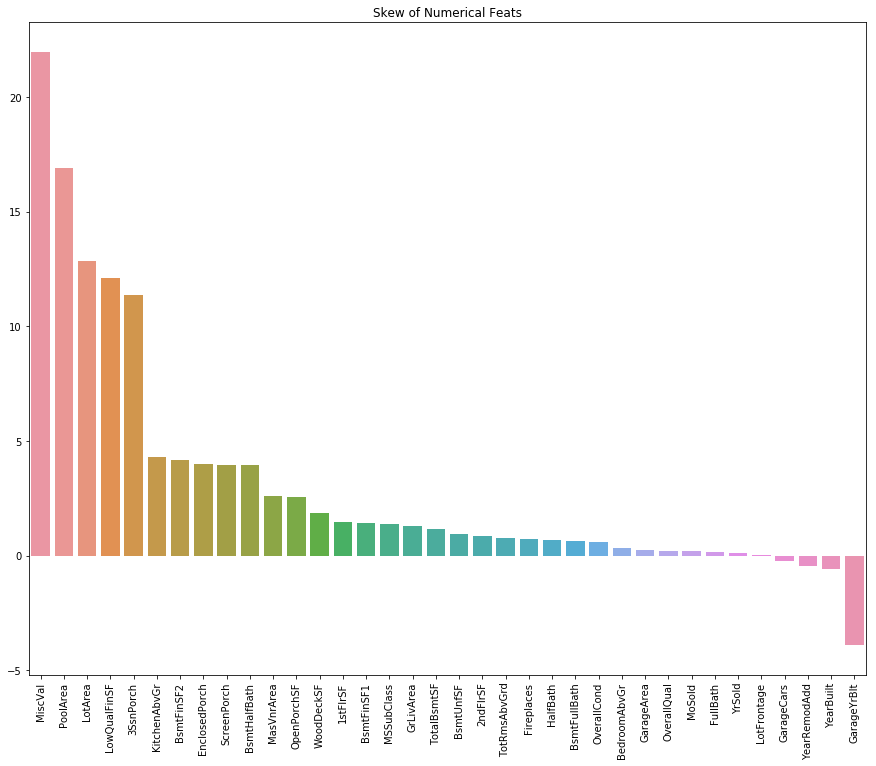

In [115]:
from scipy import stats
skewFeats = features[numericalFeat].skew().sort_values(ascending = False)
skewness = pd.DataFrame({'Skew':skewFeats})
#seeing highly skewed features
skew = []
r = 35
skewFeats2 = pd.DataFrame(skewFeats)
skewFeats2 = skewFeats2.T
#for i in skewness.index:
 #   counter = 0
  #  skew[counter] = skewness[i]
#skew
f, ax = plt.subplots(figsize=(15, 12))
plt.title('Skew of Numerical Feats')
plt.xticks(rotation='90')
sns.barplot(x=skewFeats.index, y=skewFeats)


In [117]:
from scipy.special import boxcox1p
for i in numericalFeat:
    features[i] = np.log1p(features[i])

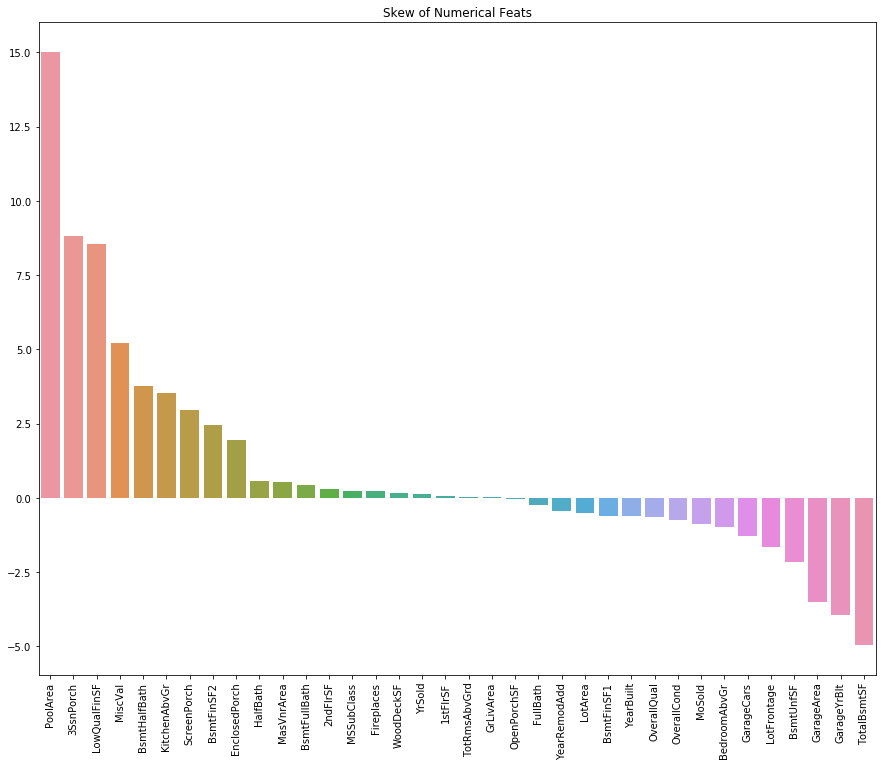

In [118]:
#rechecking Skewness
numericalFeat2 = features.dtypes[features.dtypes != 'object'].index
skewFeats2 = features[numericalFeat].skew().sort_values(ascending = False)
skewness2 = pd.DataFrame({'Skew':skewFeats})
#skewness looks a lot better, but not perfect
f, ax = plt.subplots(figsize=(15, 12))
plt.title('Skew of Numerical Feats')
plt.xticks(rotation='90')
sns.barplot(x=skewFeats2.index, y=skewFeats2)

In [124]:
#not useful features
features = features.drop(['Utilities', 'Street', 'PoolQC',], axis=1)
#combining some features that are similar
features['TotalSF']=features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']

features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
                               features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))

features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                              features['EnclosedPorch'] + features['ScreenPorch'] +
                              features['WoodDeckSF'])

In [125]:
trainingFeatures = pd.get_dummies(features).reset_index(drop=True)
trainingFeatures.shape

(2919, 304)

In [126]:
#removing test data from training DF
X = trainingFeatures.iloc[:len(y), :]
xtest = trainingFeatures.iloc[len(y):, :]
print(X.shape)
print(y.shape)

(1460, 304)
(1460,)


In [128]:
kfolds = KFold(n_splits=10, shuffle=True)

#root mean squared log error score
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

#cross val root mean squared log error score
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [129]:
import xgboost as xgb
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [130]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR

#creating models
ridge = make_pipeline(RobustScaler(), RidgeCV(cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(cv=kfolds))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [32]:
#huber is a good loss function with few outliers, that were manually taken out
#these regressors need random states so that the we don't get random outcomes
gbr = GradientBoostingRegressor(n_estimators=2500, learning_rate=0.05, 
                                max_depth=4,  loss='huber', random_state = 7) 

In [33]:
xgboost = xgb.XGBRegressor(learning_rate=0.05,n_estimators=2500,
                                     max_depth=4, min_child_weight=0,
                                     objective='reg:linear',
                                     reg_alpha=0.005, random_state = 7)

In [38]:
#Scoring models and printing scores 
score = cv_rmse(ridge)
print("Ridge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = cv_rmse(lasso)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(elasticnet)
print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Ridge: 0.1276 (0.0212)

LASSO: 0.1454 (0.0259)

elastic net: 0.1464 (0.0206)

SVR: 0.1269 (0.0255)



In [39]:

score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

gbr: 0.1293 (0.0270)

[15:04:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\joebu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\joebu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:04:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\joebu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:05:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\joebu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:05:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\joebu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:05:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\joebu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:06:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\joebu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:06:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\joebu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:07:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\joebu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:07:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\joebu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:08:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgboost: 0.1219 (0.0140)



In [40]:
elasticNetFit = elasticnet.fit(X, y)
lassoFit = lasso.fit(X, y)
ridgeFit = ridge.fit(X, y)
svrFit = svr.fit(X, y)
gbrFit = gbr.fit(X, y)
xgbFit = xgboost.fit(X, y)

C:\Users\joebu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:09:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


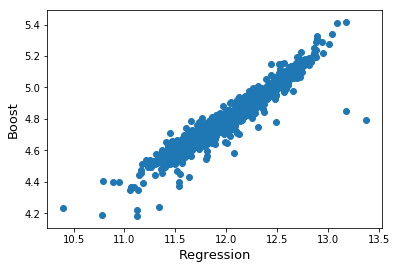

In [131]:
regressionComb = 0.25 * elasticNetFit.predict(X) + 0.25 * lassoFit.predict(X) + 0.25 * ridgeFit.predict(X) + 0.25 * svrFit.predict(X)

boostingComb = 0.2 * gbrFit.predict(X) + 0.2 * xgbFit.predict(X)
#showing regression vs boosting
fig, ax = plt.subplots()
ax.scatter(x = regressionComb, y = boostingComb)
plt.ylabel('Boost', fontsize=13)
plt.xlabel('Regression', fontsize=13)
plt.show() 

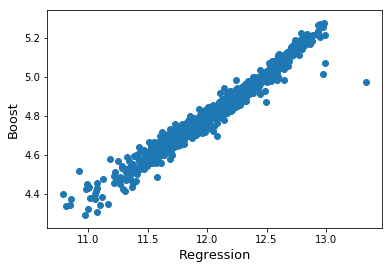

C:\Users\joebu\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in expm1
  


In [134]:
regressionPred = 0.25 * elasticNetFit.predict(xtest) + 0.25 * lassoFit.predict(xtest) + 0.25 * ridgeFit.predict(xtest) + 0.25 * svrFit.predict(xtest)

boostingPred = 0.2 * gbrFit.predict(xtest) + 0.2 * xgbFit.predict(xtest)
fig, ax = plt.subplots()

#showing prediction differences

ax.scatter(x = regressionPred, y = boostingPred)
plt.ylabel('Boost', fontsize=13)
plt.xlabel('Regression', fontsize=13)
plt.show() 
testingPred = 0.15 * elasticNetFit.predict() + 0.15 * lassoFit.predict(X) + 0.15 * ridgeFit.predict(xtest) + 0.15 * svrFit.predict(xtest)
submission = pd.read_csv("sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(testingPred))

In [135]:
submission.head()

Id  SalePrice
0  1461        inf
1  1462        inf
2  1463        inf
3  1464        inf
4  1465        inf

In [67]:
submission.to_csv("new_submission.csv", index=False)

In [119]:
score

array([0.13893534, 0.14565359, 0.13164346, 0.10736391, 0.11605506,
       0.13361918, 0.11716291, 0.09964593, 0.11250955, 0.11591687])